# testing jupyter-book ok using ffm examples

from https://github.com/markjay4k/fourier-transform 
as only use matplotlib inline

# Going from Fourier Series to Fourier Transform

### Last time we defined the Fourier Series as

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

### Let's look at the square wave centered at $x=0$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

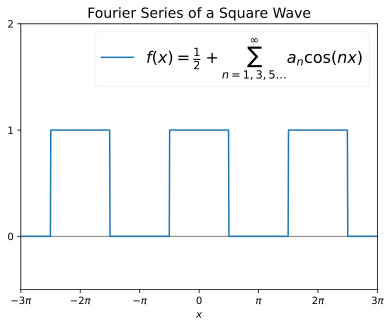

In [2]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

### But we didn't show how to calculate $a_n$

### Let's change our Fourier Series Equation

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

### where

$$
\omega_0 =\frac{2\pi}{T}
$$

### and $T$ is the fundamental period (for the square wave above, $T=2\pi$)

### The equation for $a_n$ is
$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

### For the square wave above, the limits are only $-T/4$ to $T/4$ because $f(x)=0$ for the rest of the wavelength.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

### Because $\cos(nx)$ is even, we can reduce the limits to $0$ to $T/4$ and multiply by $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

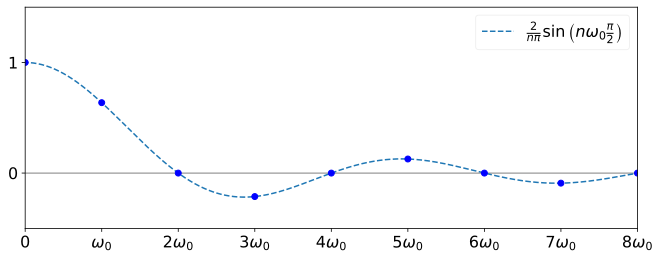

In [3]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### What if we make the squares farther apart by making $T=4\pi$ ?

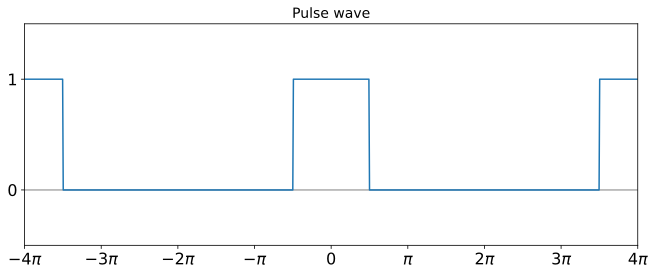

In [4]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

### The new fundamental frequency becomes $\omega'_0 =\omega_0/2$ 
### The $a_n$ coefficients become

$$
a_n = \frac{4}{n\omega'_0 T} \sin \left(n\omega'_0\frac{T}{8}\right)
$$

$$
a_n = \frac{2}{n\pi} \sin \left(n \omega'_0 \frac{\pi}{2} \right)
$$

### Since the fundametal frequency is cut in half, the spacing between coefficients are closer, but bound by the same envelope

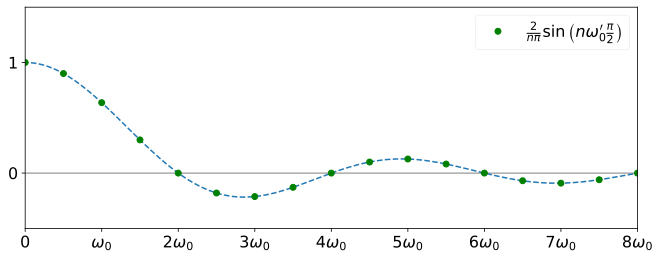

In [5]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### If $\omega_0' \rightarrow \omega_0/10$

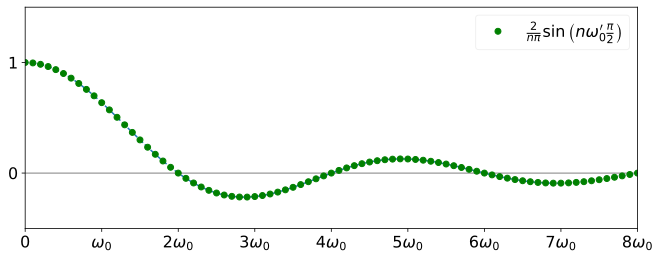

In [6]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
n = 0.1
nprime = np.arange(n, 10, n)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### The Fourier Series becomes the Fourier Transform when
$$
T \rightarrow \infty, \qquad \omega_0 \rightarrow 0
$$